In [2]:
#requirements
import json
import numpy as np 
import pandas as pd
import csv
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import dates as d

In [3]:
voc_filepath = "CA_LA_NORTH/O3.json"

In [1]:

with open(voc_filepath) as f:
    data = json.load(f)


data_df = pd.DataFrame(data)


data_df_sorted = data_df.sort_values(['date_local', 'time_local']).reset_index(drop=True)
data_df_sorted['datetime_local'] = pd.to_datetime(data_df_sorted['date_local'] + data_df_sorted['time_local'], format='%Y-%m-%d%H:%M')
data_df_sorted['year'] = pd.DatetimeIndex(data_df_sorted['datetime_local']).year
data_df_sorted['month'] = pd.DatetimeIndex(data_df_sorted['datetime_local']).month
data_df_sorted['day'] = pd.DatetimeIndex(data_df_sorted['datetime_local']).day
data_df_sorted['hour'] = pd.DatetimeIndex(data_df_sorted['datetime_local']).hour



NameError: name 'pd' is not defined

In [42]:
data_df_sorted

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,method_code,state,county,date_of_last_change,cbsa_code,datetime_local,year,month,day,hour
0,06,037,0002,44201,1,34.136500,-117.923910,WGS84,Ozone,2016-01-01,...,087,California,Los Angeles,2016-06-29,31080,2016-01-01 00:00:00,2016,1,1,0
1,06,037,0016,44201,1,34.144350,-117.850360,WGS84,Ozone,2016-01-01,...,047,California,Los Angeles,2016-07-06,31080,2016-01-01 00:00:00,2016,1,1,0
2,06,037,0113,44201,1,34.051110,-118.456360,WGS84,Ozone,2016-01-01,...,087,California,Los Angeles,2016-06-29,31080,2016-01-01 00:00:00,2016,1,1,0
3,06,037,1103,44201,1,34.066590,-118.226880,WGS84,Ozone,2016-01-01,...,087,California,Los Angeles,2016-06-30,31080,2016-01-01 00:00:00,2016,1,1,0
4,06,037,1201,44201,1,34.199250,-118.532760,WGS84,Ozone,2016-01-01,...,087,California,Los Angeles,2016-06-29,31080,2016-01-01 00:00:00,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18310,06,037,9033,44201,1,34.669739,-118.130511,NAD83,Ozone,2016-02-28,...,087,California,Los Angeles,2016-07-27,31080,2016-02-28 23:00:00,2016,2,28,23
18311,06,037,5005,44201,1,33.955070,-118.430490,NAD83,Ozone,2016-02-28,...,087,California,Los Angeles,2016-06-29,31080,2016-02-28 23:00:00,2016,2,28,23
18312,06,037,1602,44201,1,34.010290,-118.068500,NAD83,Ozone,2016-02-28,...,047,California,Los Angeles,2017-09-27,31080,2016-02-28 23:00:00,2016,2,28,23
18313,06,037,1302,44201,1,33.901389,-118.205000,WGS84,Ozone,2016-02-28,...,047,California,Los Angeles,2016-07-01,31080,2016-02-28 23:00:00,2016,2,28,23


In [43]:
data_time = data_df_sorted.pivot_table(index=["datetime_local", "year", "month", "day", "hour"],  columns="method_type", values="sample_measurement",  aggfunc='mean')


data_time.columns
data_time.to_csv('CA_LA_NORTH_CLEANED/o3_data.csv')

In [44]:
data_time

,,,,method_type,FEM
datetime_local,year,month,day,hour,
2016-01-01 00:00:00,2016,1,1,0,0.016154
2016-01-01 01:00:00,2016,1,1,1,0.015385
2016-01-01 02:00:00,2016,1,1,2,0.015308
2016-01-01 03:00:00,2016,1,1,3,0.015222
2016-01-01 04:00:00,2016,1,1,4,0.002000
...,...,...,...,...,...
2016-02-28 19:00:00,2016,2,28,19,0.034923
2016-02-28 20:00:00,2016,2,28,20,0.028692
2016-02-28 21:00:00,2016,2,28,21,0.024769


In [26]:
data_time['month'] = pd.DatetimeIndex(["datetime_local"]).month


ParserError: Unknown string format: datetime_local

Below is exploration! 

<AxesSubplot:xlabel='datetime_local'>

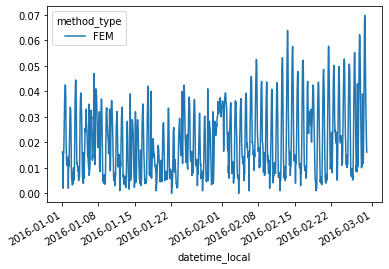

In [7]:
data_time["2016-01-01":"2016-12-31"].plot()

In [8]:
data_time['Time'] = data_time.index.time
data_time = data_time.groupby('Time').describe()

data_time
# data_time.index = pd.to_datetime(data_time.index.astype(str))

method_type   FEM                                                              \
            count      mean       std       min       25%       50%       75%   
Time                                                                            
00:00:00     59.0  0.011822  0.007004  0.003615  0.006519  0.010846  0.014333   
01:00:00     59.0  0.011904  0.006965  0.003923  0.006538  0.010538  0.015269   
02:00:00     59.0  0.011877  0.006845  0.003308  0.006962  0.010385  0.015269   
03:00:00     59.0  0.012115  0.007128  0.001000  0.006950  0.010125  0.015450   
04:00:00     54.0  0.015398  0.014688  0.000000  0.004000  0.008500  0.032000   
05:00:00     59.0  0.009701  0.005930  0.001333  0.005846  0.008077  0.012045   
06:00:00     59.0  0.008764  0.005587  0.001923  0.005115  0.007462  0.011423   
07:00:00     59.0  0.008678  0.005040  0.002250  0.005516  0.007500  0.010538   
08:00:00     59.0  0.012741  0.006296  0.002583  0.008333  0.011615  0.015962   
09:00:00     59.0  0.018728  0.006775  0.005000  0.013981  0.018769  0.023718   
10:00:00     59.0  0.025554  0.007080  0.009538  0.021031  0.025500  0.032048   
11:00:00     59.0  0.031429  0.007956  0.011600  0.026962  0.032417  0.037315   
12:00:00     59.0  0.035628  0.008962  0.014917  0.029154  0.035846  0.041500   
13:00:00     59.0  0.038744  0.009900  0.018750  0.032423  0.038833  0.044423   
14:00:00     59.0  0.039961  0.010631  0.018417  0.032792  0.039333  0.046462   
15:00:00     59.0  0.039202  0.010996  0.017833  0.031487  0.038182  0.046343   
16:00:00     59.0  0.035980  0.010982  0.017154  0.026615  0.034583  0.043337   
17:00:00     59.0  0.029634  0.010012  0.009154  0.023731  0.028750  0.035577   
18:00:00     59.0  0.023207  0.008559  0.007846  0.016234  0.023923  0.029308   
19:00:00     59.0  0.018808  0.007713  0.005769  0.012423  0.019846  0.023577   
20:00:00     59.0  0.015960  0.007076  0.004077  0.011462  0.014538  0.020577   
21:00:00     59.0  0.013743  0.006925  0.003846  0.008769  0.012538  0.018000   
22:00:00     59.0  0.012063  0.006781  0.001833  0.007417  0.010750  0.014917   
23:00:00     59.0  0.011179  0.006799  0.001636  0.006254  0.009818  0.014591   

method_type            
                  max  
Time                   
00:00:00     0.035538  
01:00:00     0.036231  
02:00:00     0.035385  
03:00:00     0.034700  
04:00:00     0.047000  
05:00:00     0.034692  
06:00:00     0.033000  
07:00:00     0.031385  
08:00:00     0.034000  
09:00:00     0.033250  
10:00:00     0.035846  
11:00:00     0.046077  
12:00:00     0.057923  
13:00:00     0.066846  
14:00:00     0.069846  
15:00:00     0.066000  
16:00:00     0.060769  
17:00:00     0.055077  
18:00:00     0.041923  
19:00:00     0.034923  
20:00:00     0.033231  
21:00:00     0.034231  
22:00:00     0.034083  
23:00:00     0.033417

In [9]:
data_time.index = pd.to_datetime(data_time.index.astype(str))
data_time.index


DatetimeIndex(['2022-03-25 00:00:00', '2022-03-25 01:00:00',
               '2022-03-25 02:00:00', '2022-03-25 03:00:00',
               '2022-03-25 04:00:00', '2022-03-25 05:00:00',
               '2022-03-25 06:00:00', '2022-03-25 07:00:00',
               '2022-03-25 08:00:00', '2022-03-25 09:00:00',
               '2022-03-25 10:00:00', '2022-03-25 11:00:00',
               '2022-03-25 12:00:00', '2022-03-25 13:00:00',
               '2022-03-25 14:00:00', '2022-03-25 15:00:00',
               '2022-03-25 16:00:00', '2022-03-25 17:00:00',
               '2022-03-25 18:00:00', '2022-03-25 19:00:00',
               '2022-03-25 20:00:00', '2022-03-25 21:00:00',
               '2022-03-25 22:00:00', '2022-03-25 23:00:00'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [10]:
data_time['FEM','mean_minstd'] = data_time['FEM','mean']-data_time['FEM','std']
data_time['FEM','mean_plusstd'] = data_time['FEM','mean']+data_time['FEM','std']

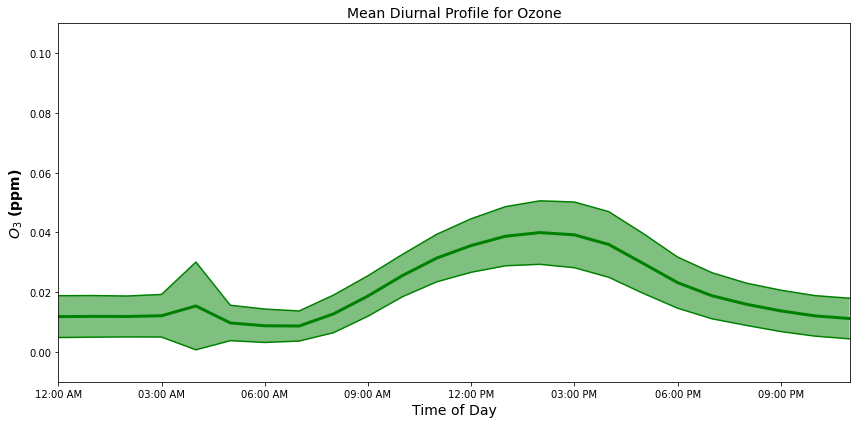

In [11]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.set_title('Mean Diurnal Profile for Ozone', fontsize=14)
ax.set_ylabel('$O_3$ (ppm)', fontsize=14, weight='bold')
ax.set_xlabel('Time of Day', fontsize=14)
ax.plot(data_time.index, data_time['FEM','mean'], 'g', linewidth=3.0)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%I:%M %p'))
ax.set_xlim(pd.Timestamp('00:00'), pd.Timestamp('23:00'))
ax.set_ylim(-.01, 0.11)

#std
ax.plot(data_time.index, data_time['FEM','mean_plusstd'], color='g')
ax.plot(data_time.index, data_time['FEM','mean_minstd'], color='g')
ax.fill_between(data_time.index, data_time['FEM','mean'], data_time['FEM','mean_plusstd'], alpha=.5, facecolor='g')
ax.fill_between(data_time.index, data_time['FEM','mean'], data_time['FEM','mean_minstd'], alpha=.5, facecolor='g')

plt.tight_layout()
plt.show()